In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

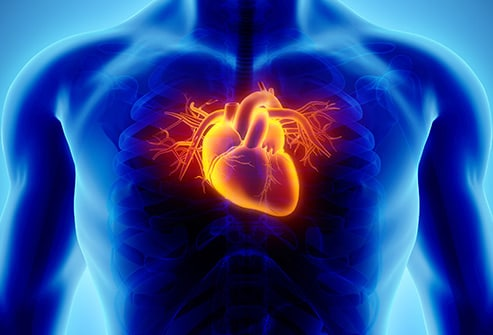

**Problem statement:** Predict the Heart Attack based on the features provided.

**Objective:** The features are provided with output feature as 0 & 1, 0 is the no heart attack and 1 is yes to heart attack. since it is medical related information. Our object is to minimize the False Negative (model predicting the actual patient as "no")

In [ ]:
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [ ]:
df.shape

In [ ]:
df.head(10)

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
msno.matrix(df)

In [ ]:
msno.bar(df)

In [ ]:
corr=df.corr()
figure, axis=plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [ ]:
sns.pairplot(df, hue="output")

In [ ]:
df['output'].agg(['count', 'size', 'nunique'])

In [ ]:
pd.value_counts(df['output'])

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x="output", data=df, palette='magma');

In [ ]:

plt.figure(figsize=(18, 10))
plt.style.use("ggplot")
sns.countplot(x=df["age"]);  # using countplot
plt.title("Age to Count Plot", fontsize=20)
plt.xlabel("AGE", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

In [ ]:
df.columns

## **Visualising Categorical Data**

In [ ]:
sns.catplot(x="sex", data=df, kind="count", hue="output")

In [ ]:
sns.catplot(x="cp", data=df, kind="count", hue="output")

In [ ]:
sns.catplot(x="fbs", data=df, kind="count", hue="output")
sns.catplot(x="restecg", data=df, kind="count", hue="output")
sns.catplot(x="exng", data=df, kind="count", hue="output")
sns.catplot(x="slp", data=df, kind="count", hue="output")
sns.catplot(x="caa", data=df, kind="count", hue="output")
sns.catplot(x="thall", data=df, kind="count", hue="output");

## **Visualising Numerical Data**

In [ ]:
sns.catplot(x="output", y="age", data=df, kind="box")
sns.catplot(x="output", y="trtbps", data=df, kind="box")
sns.catplot(x="output", y="chol", data=df, kind="box")
sns.catplot(x="output", y="thalachh", data=df, kind="box")
sns.catplot(x="output", y="oldpeak", data=df, kind="box");

## **chest pain count**

In [ ]:
chest_pain_count = df["cp"].value_counts().reset_index()
chest_pain_count

In [ ]:
plt.figure(figsize=(20, 10))
plt.style.use("ggplot")
sns.barplot(x=chest_pain_count["index"], y=chest_pain_count["cp"])
plt.title("TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS", fontsize=20)
plt.xlabel("CHEST PAIN TYPE", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

## **Age count**

In [ ]:
Age_count = df["age"].value_counts().reset_index()
Age_count

In [ ]:
plt.figure(figsize=(12, 8))
plt.style.use("ggplot")
sns.histplot(data=df, x='age', hue='output')
plt.title("AGE EFFECT ON THE HEART-ATTACK")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## **Blood Pressure distribution among patients**

In [ ]:
plt.style.use("ggplot")
sns.displot(df["trtbps"], color="y")   #using displot here
plt.title("DISTRIBUTION OF BLOOD PRESSURE AMONG PATIENTS",fontsize=18)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

## **Cholestrol distribution vs patients count**

In [ ]:
plt.style.use("ggplot")
sns.set_color_codes()
sns.displot(df["chol"], color="r")
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL AMONG PATIENTS", fontsize=18)
plt.xlabel("CHOLESTROL LEVEL", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

## **Heart rate vs patient count**

In [ ]:
plt.style.use("ggplot")
sns.displot(df["thalachh"], color="green")
plt.title("DISTRIBUTION OF HEART RATE AMONG PATIENTS", fontsize=18)
plt.xlabel("HEART RATE", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

# **Data Preprocessing**

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
#dividing data
X = df.drop("output",axis = 1)
y = df.output

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#importing train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42,shuffle=True, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#   **Classification Models**

## **Random Forest**

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

RFclfModel = RandomForestClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
RFclfModel.fit(X_train,y_train)

predict1=RFclfModel.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy for the random forest =:",metrics.accuracy_score(y_test,predict1))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_RFclfModel)
pd.crosstab(y_test, predict1, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
sns.heatmap(confusion_matrix(y_test,predict1), annot=True)
plt.show()

In [ ]:
 from sklearn.metrics import classification_report
print("classification report for the random forest =\r", classification_report(y_test, predict1))

## **K Neighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNModel = KNeighborsClassifier(1)
KNNModel.fit(X_train,y_train)
predict2=KNNModel.predict(X_test)


In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy for the KNN Model =:",metrics.accuracy_score(y_test, predict2))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_KNNModel)
pd.crosstab(y_test,predict2, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
sns.heatmap(confusion_matrix(y_test,predict2), annot=True)
plt.show()

In [ ]:
 from sklearn.metrics import classification_report
print("classification report for the random forest =\r", classification_report(y_test, predict2))

## **support vector machine**

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
predict3 = svc_model.predict(X_test)

In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test,predict3))
print("\n")
print(classification_report(y_test, predict3))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict3)
pd.crosstab(y_test,predict3, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
sns.heatmap(confusion_matrix(y_test,predict3), annot=True)
plt.show()

## **naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, y_train)
predict4 = naive.predict(X_test)

In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predict4 ))
print("\n")
print(classification_report(y_test, predict4 ))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict4)
pd.crosstab(y_test,predict4, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
sns.heatmap(confusion_matrix(y_test,predict4), annot=True)
plt.show()